<a href="https://colab.research.google.com/github/Datriks/Python-for-Finance/blob/master/Rbs_calc_returns_and_volatility.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from pandas_datareader import data as wb
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(16,6)
plt.style.use('bmh')

In [4]:
# Download data
df = wb.DataReader('RBS.L',
                   data_source='yahoo',
                   start='2011-1-1')

df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2011-01-04,412.500000,403.000000,405.000000,406.799988,10912708.0,354.905823
2011-01-05,410.000000,398.000000,407.000000,409.500000,9658431.0,357.261383
2011-01-06,416.500000,402.000000,405.399994,404.899994,11210095.0,353.248199
2011-01-07,404.100006,399.399994,404.000000,401.000000,9055659.0,349.845703
2011-01-10,404.700012,393.799988,400.799988,395.000000,6564457.0,344.611115


In [5]:
#keep only the adjusted close price
df = df.loc[:,['Adj Close']]
df.rename(columns={'Adj Close':'adj_close'},inplace=True)
df.head()

,adj_close
Date,
2011-01-04,354.905823
2011-01-05,357.261383
2011-01-06,353.248199
2011-01-07,349.845703
2011-01-10,344.611115


In [6]:
#calculate simple returns
df['Log_returns'] = np.log(df.adj_close/df.adj_close.shift(1))
df.head()

,adj_close,Log_returns
Date,,
2011-01-04,354.905823,NaN
2011-01-05,357.261383,0.006615
2011-01-06,353.248199,-0.011297
2011-01-07,349.845703,-0.009679
2011-01-10,344.611115,-0.015076


In [7]:
#remove redundant data
df.drop('adj_close',axis=1,inplace=True)
df.dropna(axis=0,inplace=True)
df.head()

,Log_returns
Date,
2011-01-05,0.006615
2011-01-06,-0.011297
2011-01-07,-0.009679
2011-01-10,-0.015076
2011-01-11,0.019058


In [0]:
# define function to calculate realized volatility
def realised_volatility(x):
  return np.sqrt(np.sum(x**2))

In [16]:
#calculate monthly realised volatility
df_rv = df.groupby(pd.Grouper(freq='M')).apply(realised_volatility)
df_rv.rename(columns={'Log_returns':'rv'},inplace=True)
df_rv.head()

,rv
Date,
2011-01-31,0.091576
2011-02-28,0.092568
2011-03-31,0.060047
2011-04-30,0.068274
2011-05-31,0.090509


In [0]:
# anualized values
df_rv.rv = df_rv.rv*np.sqrt(12)

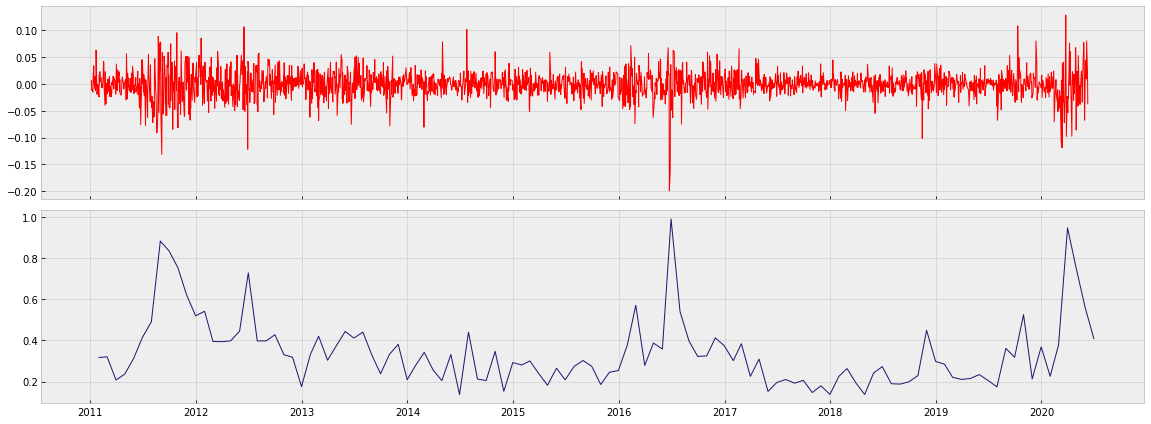

In [23]:
# Plot the results
fig, ax = plt.subplots(2,1,sharex=True)
ax[0].plot(df,color='red',lw=1)
ax[1].plot(df_rv,color='midnightblue',lw=1)
plt.tight_layout()
plt.show()